In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 8.0)
import seaborn as sns
data=pd.read_csv("c:/users/win7/desktop/new folder/train.csv");
data.head(10)



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [17]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log
count,593.000000,593.000000,571.000000,579.000000,545.000000,571.000000
mean,5008.303541,1621.421450,138.584939,343.108808,0.840367,4.844987
std,4964.934658,2920.234332,60.191895,63.269678,0.366602,0.418143
min,150.000000,0.000000,35.000000,12.000000,0.000000,3.555348
25%,2873.000000,0.000000,100.000000,360.000000,1.000000,4.605170
50%,3750.000000,1255.000000,127.000000,360.000000,1.000000,4.844187
75%,5695.000000,2306.000000,162.000000,360.000000,1.000000,5.087596
max,81000.000000,41667.000000,400.000000,480.000000,1.000000,5.991465


In [190]:
print "The skewness of SalePrice is {}".format(data['ApplicantIncome'].skew())
#data.head(10)

The skewness of SalePrice is 6.53951311399


('The skewness is ', 0.022111652528892738)


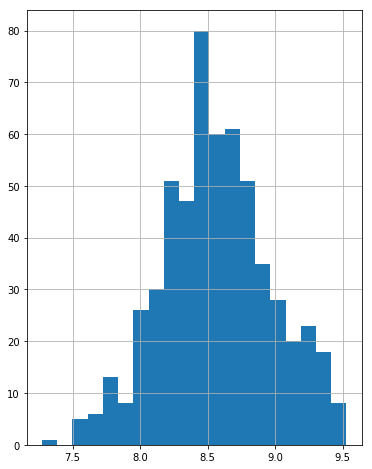

In [191]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.drop(data[data['TotalIncome'] > 14100].index, inplace=True)
data['TotalIncome_log'] = np.log(data['TotalIncome'])
data['TotalIncome_log'].hist(bins=20) 
print( "The skewness is ",data['TotalIncome_log'].skew())


0.87934909874364919

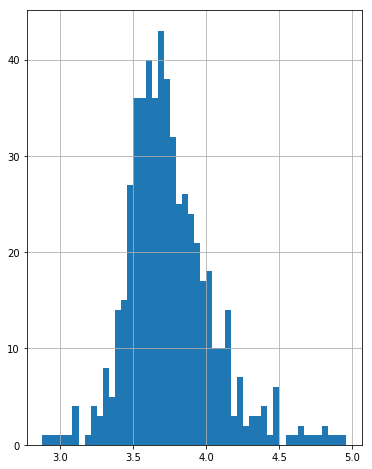

In [207]:
data['payback']=data['TotalIncome']/data['LoanAmount']
data['payback']=np.log(data['payback'])
data.drop(data[data['payback'] > 5.0].index, inplace=True)
data.drop(data[data['payback'] < 2.8].index, inplace=True)
data['payback'].hist(bins=50)
data['payback'].skew()

('The skewness is ', 1.4805354042461627)


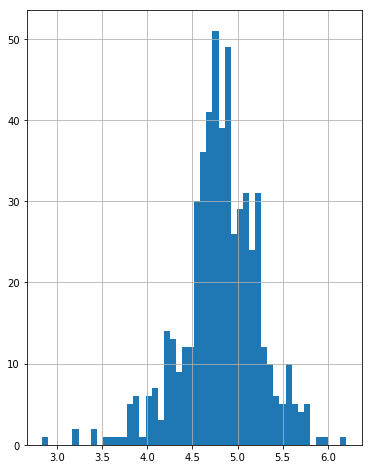

In [193]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
print( "The skewness is ",data['LoanAmount'].skew())
data['LoanAmount_log'].hist(bins=50)

('The skewness is ', 1.1938283634976814)
('The skewness is ', -0.14682438575273168)


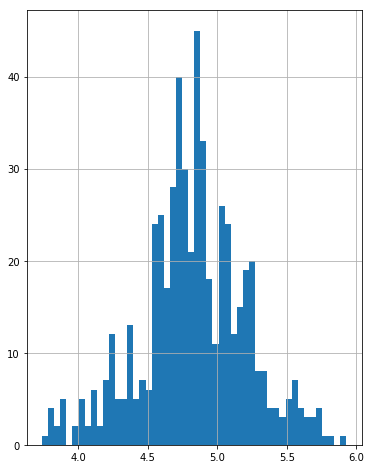

In [221]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
print( "The skewness is ",data['LoanAmount'].skew())
data.drop(data[data['LoanAmount_log'] < 3.7].index, inplace=True)
data.drop(data[data['LoanAmount_log'] > 6.0].index, inplace=True)
print( "The skewness is ",data['LoanAmount_log'].skew())
data['LoanAmount_log'].hist(bins=50)


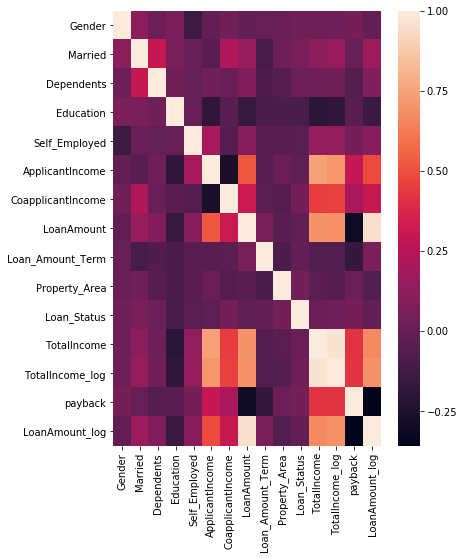

In [230]:
numeric_data = data.select_dtypes(include=[np.number])
cat_data = data.select_dtypes(exclude=[np.number])
corr = numeric_data.corr()
sns.heatmap(corr)

In [231]:
print (corr['Loan_Status'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Loan_Status'].sort_values(ascending=False)[-5:]) #last 5 values`


(Loan_Status          1.000000
Married              0.051790
CoapplicantIncome    0.049766
payback              0.049522
Property_Area        0.042655
TotalIncome_log      0.029294
Gender               0.025765
Dependents           0.014110
TotalIncome          0.010467
Loan_Amount_Term    -0.008375
LoanAmount_log      -0.008991
LoanAmount          -0.019238
ApplicantIncome     -0.026172
Self_Employed       -0.035238
Education           -0.093537
Name: Loan_Status, dtype: float64, '\n')
----------------------
LoanAmount_log    -0.008991
LoanAmount        -0.019238
ApplicantIncome   -0.026172
Self_Employed     -0.035238
Education         -0.093537
Name: Loan_Status, dtype: float64


In [122]:
#data.boxplot(column='ApplicantIncome')

In [197]:
#data.boxplot(column='LoanAmount')

In [124]:
#data.boxplot(column='ApplicantIncome' ,by='Education')

In [198]:
temp1 = data['Credit_History'].value_counts(ascending=True)
temp2 = data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print 'Frequency Table for Credit History:' 
print temp1

print '\nProbility of getting loan for each Credit History class:' 
print temp2

Frequency Table for Credit History:
0.0     83
1.0    426
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.072289
1.0                0.805164


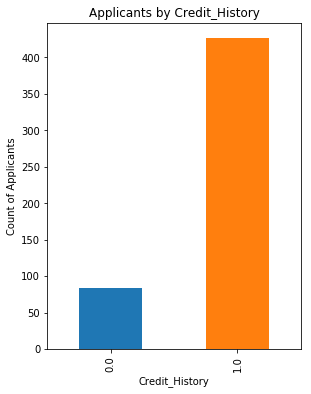

In [219]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar' )



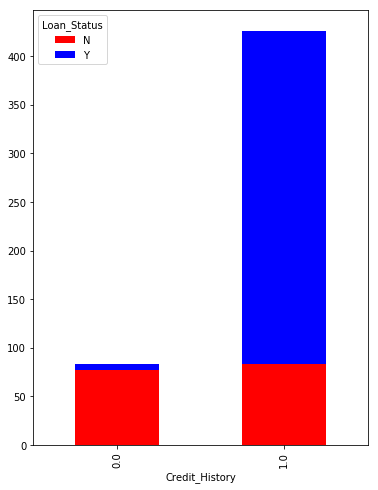

In [200]:
temp3 = pd.crosstab(data['Credit_History'], data['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [121]:
#data.columns[data.isnull().any()]

In [222]:
miss=data.isnull().sum()/len(data);
miss

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.025316
Credit_History       0.000000
Property_Area        0.000000
Loan_Status          0.000000
TotalIncome          0.000000
TotalIncome_log      0.000000
payback              0.000000
LoanAmount_log       0.000000
dtype: float64

In [4]:
#miss.plot(kind='bar');
miss1=data.isnull().sum();
miss1

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
data['Self_Employed'].fillna('No',inplace=True)
data['Credit_History'].fillna('1.0',inplace=True)
table = data.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
data['LoanAmount'].fillna(data[data['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [209]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.dtypes 
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,payback,LoanAmount_log
0,LP001002,11,3,15,0,0,5849,0.0,128.0,360.0,1,2,1,5849.0,8.674026,3.821996,NaN
1,LP001003,11,4,16,0,0,4583,1508.0,128.0,360.0,1,0,0,6091.0,8.714568,3.862537,4.852030
2,LP001005,11,4,15,0,1,3000,0.0,66.0,360.0,1,2,1,3000.0,8.006368,3.816713,4.189655
3,LP001006,11,4,15,1,0,2583,2358.0,120.0,360.0,1,2,1,4941.0,8.505323,3.717831,4.787492
4,LP001008,11,3,15,0,0,6000,0.0,141.0,360.0,1,2,1,6000.0,8.699515,3.750755,4.948760
5,LP001011,11,4,17,0,1,5417,4196.0,267.0,360.0,1,2,1,9613.0,9.170872,3.583623,5.587249
6,LP001013,11,4,15,1,0,2333,1516.0,95.0,360.0,1,2,1,3849.0,8.255569,3.701692,4.553877
7,LP001014,11,4,18,0,0,3036,2504.0,158.0,360.0,0,1,0,5540.0,8.619750,3.557155,5.062595
8,LP001018,11,4,17,0,0,4006,1526.0,168.0,360.0,1,2,1,5532.0,8.618305,3.494341,5.123964
10,LP001024,11,4,17,0,0,3200,700.0,70.0,360.0,1,2,1,3900.0,8.268732,4.020237,4.248495


In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [211]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var1 = ['Credit_History','Education','Married','Self_Employed','Property_Area','payback']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 81.736%
Cross-Validation Score : 81.744%


In [212]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education','payback']
classification_model(model, data,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 69.261%


In [228]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = [ 'Credit_History','payback','TotalIncome_log','LoanAmount_log']
classification_model(model, data,predictor_var,outcome_var)


Accuracy : 100.000%
Cross-Validation Score : 80.305%
